# NFL Big Data Bowl

Data set can be found <a href='https://www.kaggle.com/c/nfl-big-data-bowl-2020/overview'> *here* </a>    <br>
'Yards' column is the value we are predicting

---

# Data Import

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv("data/nfl-big-data-bowl-2020/train.csv")
train_X = data.drop('Yards', axis=1)
train_y = data['Yards']

### Initial data exploration

In [87]:
data.shape # checking the size of the dataframe

(682154, 49)

In [92]:
#overview of the data types and null values
# columns: 'Team', 'DisplayName', 'GameClock', 'PossessionTeam', 'FieldPosition', 'OffenseFormation', 'OffensePersonnel'
#          'DefensePersonnel', 'PlayDirection', 'TimeHandoff', 'TimeSnap', ***'PlayerHeight'***, 'PlayerBirthDate', 
#          'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr', 'Stadium', 'Location', 'StadiumType',
#          'StadiumType', 'Turf', 'GameWeather', 'WindSpeed', 'WindDirection',

# 'PlayerHeight' (and others) should not be an object/string
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
GameId                    682154 non-null int64
PlayId                    682154 non-null int64
Team                      682154 non-null object
X                         682154 non-null float64
Y                         682154 non-null float64
S                         682154 non-null float64
A                         682154 non-null float64
Dis                       682154 non-null float64
Orientation               682131 non-null float64
Dir                       682126 non-null float64
NflId                     682154 non-null int64
DisplayName               682154 non-null object
JerseyNumber              682154 non-null int64
Season                    682154 non-null int64
YardLine                  682154 non-null int64
Quarter                   682154 non-null int64
GameClock                 682154 non-null object
PossessionTeam            682154 non-null object
Down   

In [90]:
data.describe()

,GameId,PlayId,X,Y,S,A,Dis,Orientation,Dir,NflId,...,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,DefendersInTheBox,Yards,PlayerWeight,Week,Temperature,Humidity
count,6.821540e+05,6.821540e+05,682154.000000,682154.000000,682154.000000,682154.000000,682154.000000,682131.000000,682126.000000,6.821540e+05,...,682154.000000,682154.000000,682154.000000,6.821540e+05,682132.000000,682154.000000,682154.000000,682154.000000,618508.000000,675994.000000
mean,2.017975e+09,2.017975e+13,60.036863,26.791456,2.634598,1.701739,0.278193,179.996742,180.040620,2.369743e+06,...,8.319154,11.047989,9.762570,2.446079e+06,6.910340,4.227626,253.414628,8.401587,62.010066,54.741563
std,7.844593e+05,7.844593e+09,25.499310,7.192919,1.404773,0.991380,0.145218,102.794554,106.189491,6.053648e+05,...,3.818716,10.095556,9.532945,4.833287e+05,0.985065,6.449866,48.469869,4.808791,17.071117,25.146693
min,2.017091e+09,2.017091e+13,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,...,1.000000,0.000000,0.000000,2.340000e+02,2.000000,-15.000000,153.000000,1.000000,9.000000,0.000000
25%,2.017113e+09,2.017113e+13,39.080000,22.760000,1.520000,0.950000,0.160000,90.060000,90.150000,2.532989e+06,...,6.000000,3.000000,0.000000,2.540269e+06,6.000000,1.000000,210.000000,4.000000,50.000000,43.000000
50%,2.018101e+09,2.018101e+13,60.230000,26.800000,2.510000,1.550000,0.270000,179.640000,180.180000,2.550541e+06,...,10.000000,10.000000,7.000000,2.555224e+06,7.000000,3.000000,245.000000,8.000000,64.000000,59.000000
75%,2.019091e+09,2.019091e+13,80.990000,30.850000,3.620000,2.310000,0.390000,269.780000,270.260000,2.556445e+06,...,10.000000,17.000000,16.000000,2.558116e+06,7.000000,6.000000,305.000000,12.000000,75.000000,71.000000
max,2.019112e+09,2.019113e+13,117.650000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.563364e+06,...,40.000000,57.000000,59.000000,2.563327e+06,11.000000,99.000000,380.000000,17.000000,97.000000,100.000000


In [84]:
train_X.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [85]:
train_y.head()

0    8
1    8
2    8
3    8
4    8
Name: Yards, dtype: int64

In [25]:
#couinting the number of players in the data set and the number of rushers
 

print(f"Number of players: {data['NflId'].nunique()}", "\n", 
      f"Number of rushers: {data['NflIdRusher'].nunique()}")

Number of players: 2570 
 Number of rushers: 443


In [20]:
data.groupby('NflIdRusher').sum()['Yards']

NflIdRusher
234         6886
262         2508
284          -44
925         6644
949        15202
           ...  
2563062     2002
2563155      220
2563296      616
2563300      154
2563327      462
Name: Yards, Length: 443, dtype: int64

In [ ]:
temp_train_X

# Exploratory Analysis

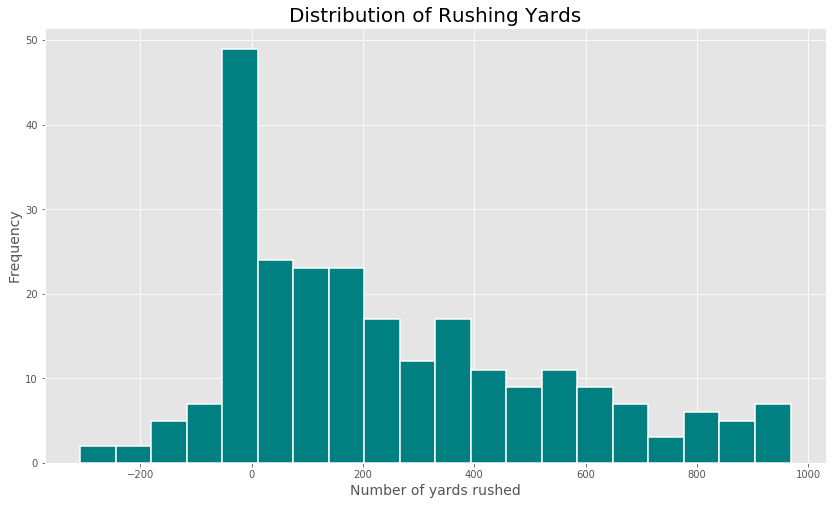

In [70]:
prac_x = data.groupby('NflIdRusher').sum()['Yards']

plt.figure(figsize=(14,8))
plt.style.use('ggplot')
plt.title('Distribution of Rushing Yards', fontsize=20)
plt.xlabel('Number of yards rushed', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.hist(prac_x.loc[prac_x < 1_000], bins=20, color='#008080', edgecolor='white', linewidth=1.5)
plt.show();

# Modelling

In [110]:
# to get a quick idea of the baseline model I have used 2 predictors
temp_train_X = train_X[['Distance', 'Down']]

base_model = LinearRegression()
base_model.fit(temp_train_X, train_y)

yrds_from_first = 8
number_downs = 3
result = base_model.predict(np.array([[8, 3]]))
print(f'If the team is on {number_downs}rd down and {yrds_from_first} yards away from 1st down',
      f'we can expect { int(np.round(result, 1)) } yrds on the next play')


If the team is on 3rd down and 8 yards away from 1st down we can expect 4 yrds on the next play


# Conclusion